In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [34]:
df = pd.read_csv('Diabetes_health_indicators.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


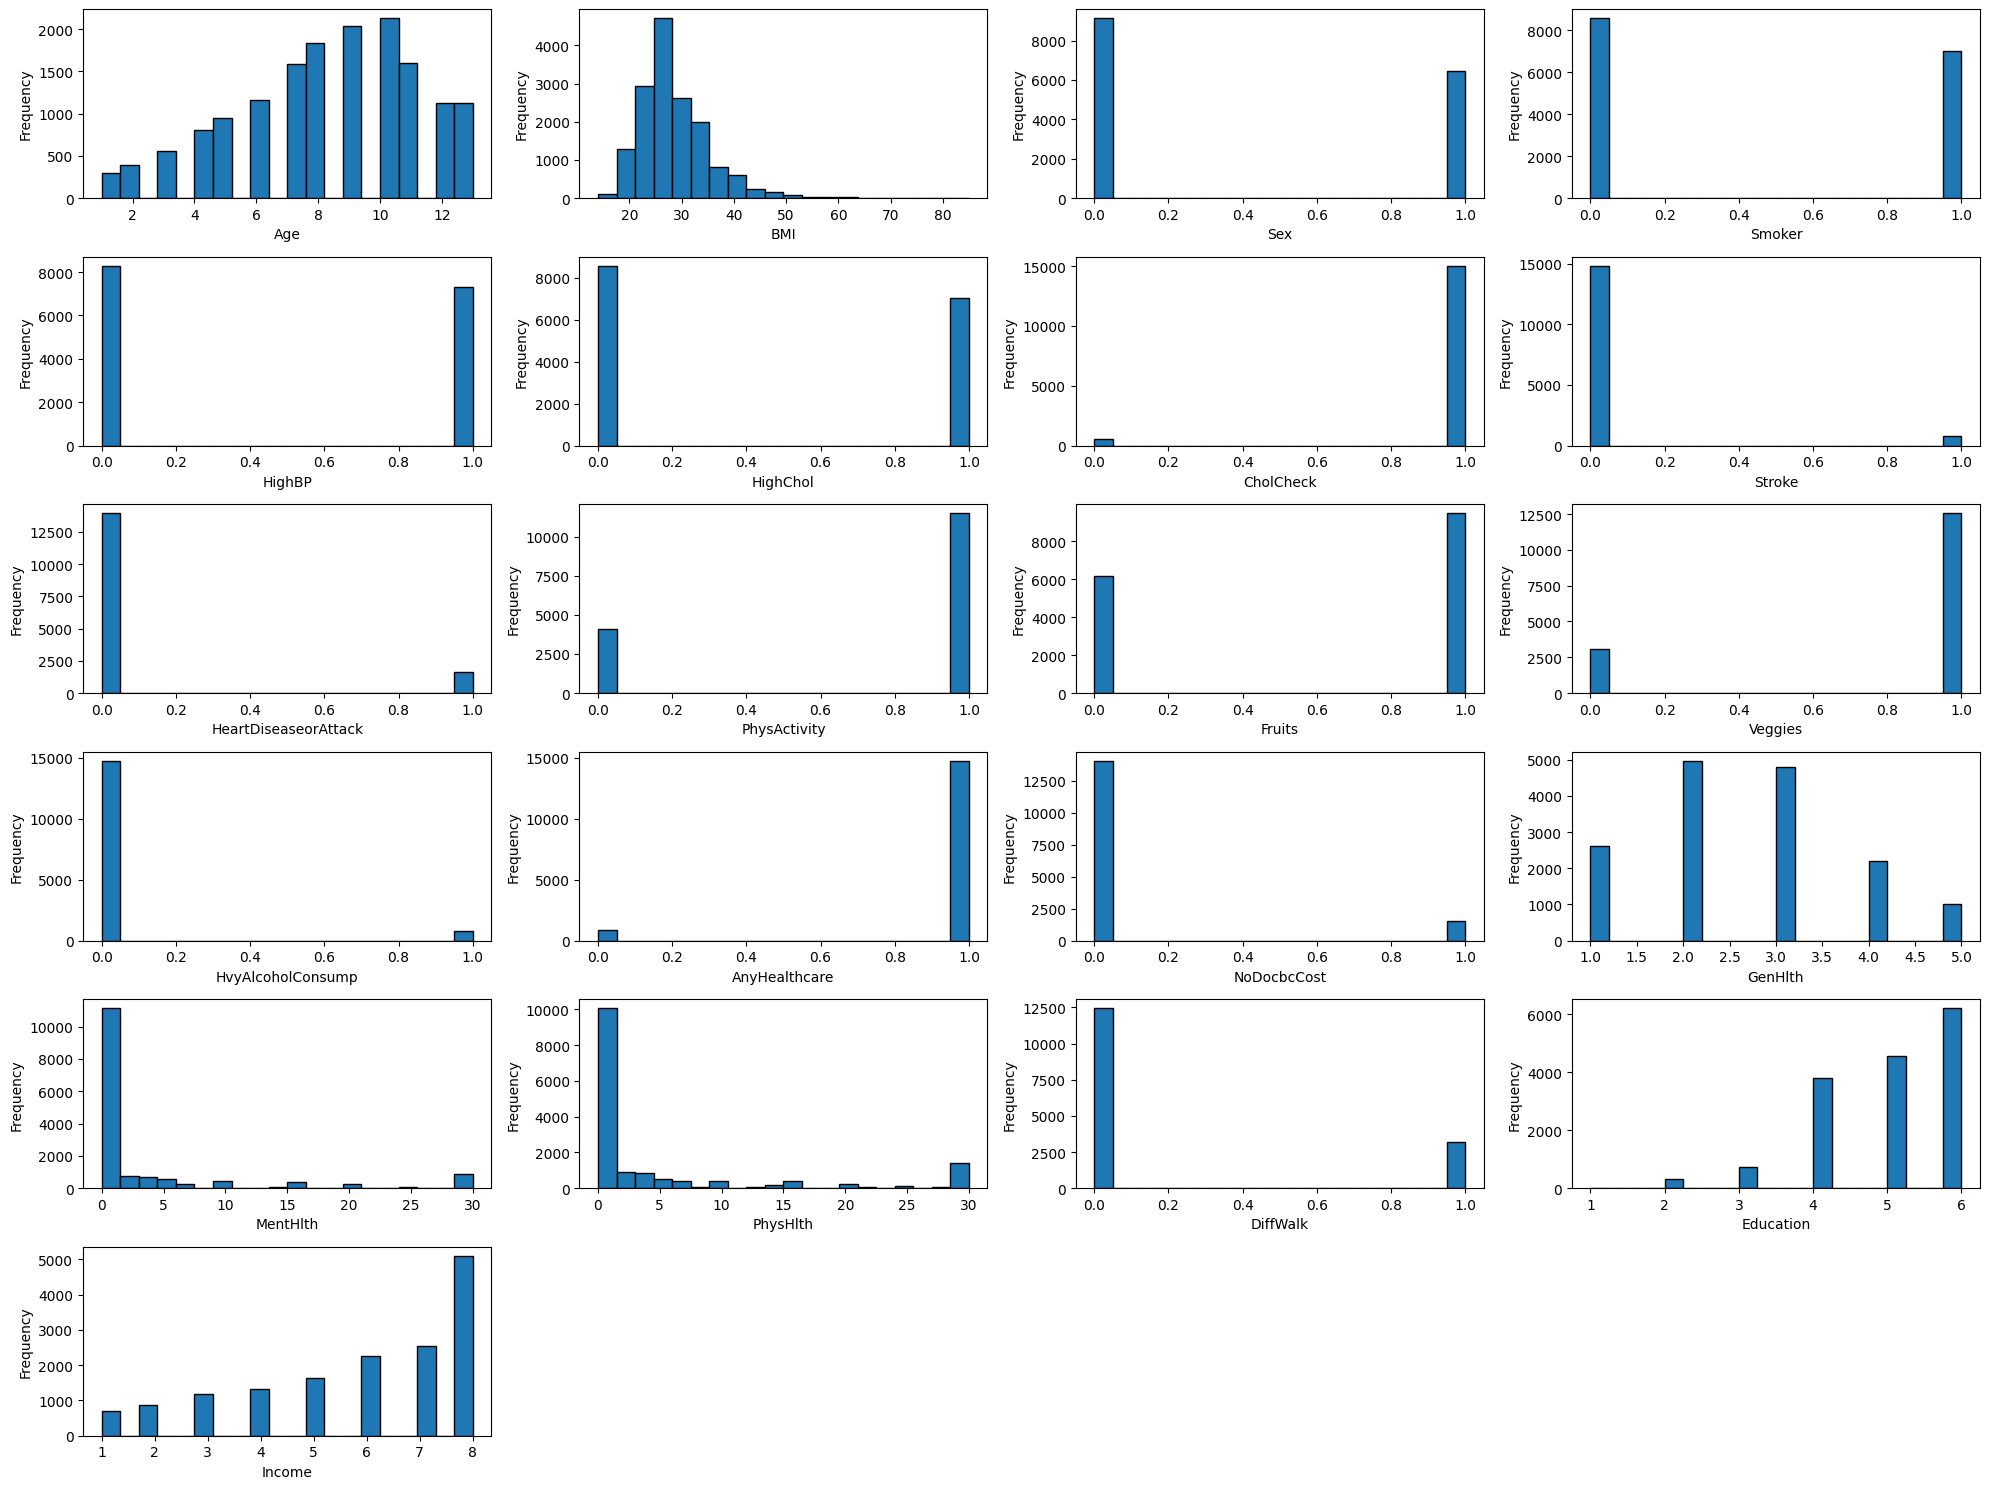

In [35]:
features = ['Age', 'BMI', 'Sex', 'Smoker', 'HighBP', 'HighChol', 'CholCheck', 'Stroke',
            'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
            'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
            'Education', 'Income']

plt.figure(figsize=(20, 15))

num_features = len(features)
num_cols = 4  # Number of columns in the grid
num_rows = (num_features // num_cols) + (1 if num_features % num_cols > 0 else 0)  # Calculate number of rows needed

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.hist(df[feature], bins=20, edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [36]:
df['Sex'] = df['Sex'].map({0: 'Female', 1: 'Male'})
df['Smoker'] = df['Smoker'].map({0: 'No', 1: 'Yes'})
df['Stroke'] = df['Stroke'].map({0: 'No', 1: 'Yes'})
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].map({0: 'No', 1: 'Yes'})
df['PhysActivity'] = df['PhysActivity'].map({0: 'No', 1: 'Yes'})
df['Fruits'] = df['Fruits'].map({0: 'No', 1: 'Yes'})
df['Veggies'] = df['Veggies'].map({0: 'No', 1: 'Yes'})
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].map({0: 'No', 1: 'Yes'})
df['AnyHealthcare'] = df['AnyHealthcare'].map({0: 'No', 1: 'Yes'})
df['NoDocbcCost'] = df['NoDocbcCost'].map({0: 'No', 1: 'Yes'})
df['DiffWalk'] = df['DiffWalk'].map({0: 'No', 1: 'Yes'})
df['HighBP'] = df['HighBP'].map({0: 'No', 1: 'Yes'})
df['HighChol'] = df['HighChol'].map({0: 'No', 1: 'Yes'})
df['CholCheck'] = df['CholCheck'].map({0: 'No', 1: 'Yes'})


In [37]:
X = df[features]
y = df['Diabetes_012']

In [38]:
numeric_features = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']
categorical_features = ['Sex', 'Smoker', 'HighBP', 'HighChol', 'CholCheck', 'Stroke',
                        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']


In [39]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [40]:
X_processed = preprocessor.fit_transform(X)
print(X_processed[:5])


[[ 2.45988373e-01  1.79489338e+00  2.13941874e+00  1.85468794e+00
   1.10018808e+00 -9.91741867e-01 -1.33923886e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   1.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-4.21334150e-01 -5.52264864e-01  3.44741277e-01 -4.48970355e-01
  -5.23884229e-01  9.92250094e-01 -2.27271570e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  1.00000000e+00
   0.00000000e+00  1.0000

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [42]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [43]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8270893371757925
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      2570
           1       0.00      0.00      0.00        57
           2       0.51      0.21      0.30       496

    accuracy                           0.83      3123
   macro avg       0.45      0.39      0.40      3123
weighted avg       0.78      0.83      0.79      3123

Confusion Matrix:
 [[2480    0   90]
 [  49    0    8]
 [ 393    0  103]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

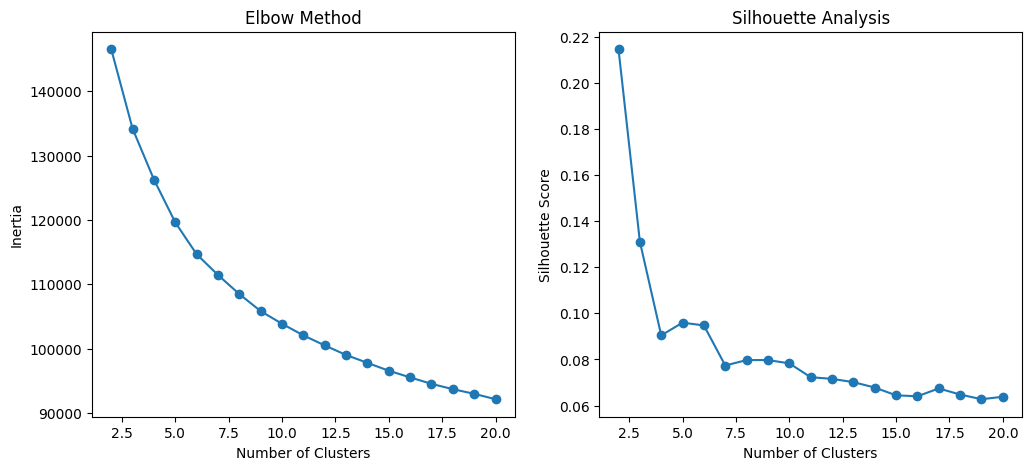

The optimal number of clusters is: 2


In [44]:
inertia = []
silhouette_scores = []
K = range(2, 21)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_processed, kmeans.labels_))

# Plot the Elbow curve and Silhouette scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.show()

# Determine the optimal number of clusters
optimal_clusters = K[silhouette_scores.index(max(silhouette_scores))]
print(f'The optimal number of clusters is: {optimal_clusters}')


In [45]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_processed)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


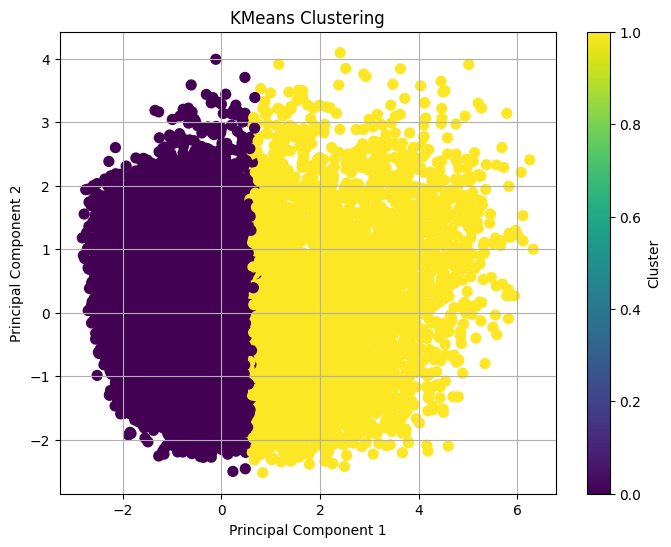

In [46]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Scatter plot of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [47]:
def generate_recommendations(cluster):
    if cluster == 0:
        return "Increase physical activity and improve diet quality."
    elif cluster == 1:
        return "Focus on weight management and reduce alcohol consumption."
    elif cluster == 2:
        return "Monitor blood sugar levels closely and maintain a balanced diet."
    elif cluster == 3:
        return "Reduce smoking and follow a low-carb diet."
    elif cluster == 4:
        return "Increase fiber intake and manage stress levels."
    # Add more detailed recommendations for additional clusters

df['Recommendations'] = df['Cluster'].apply(generate_recommendations)

# Display sample data with recommendations
print(df.head())


   Diabetes_012 HighBP HighChol CholCheck  BMI Smoker Stroke  \
0             0    Yes      Yes       Yes   40    Yes     No   
1             0     No       No        No   25    Yes     No   
2             0    Yes      Yes       Yes   28     No     No   
3             0    Yes       No       Yes   27     No     No   
4             0    Yes      Yes       Yes   24     No     No   

  HeartDiseaseorAttack PhysActivity Fruits  ... GenHlth MentHlth PhysHlth  \
0                   No           No     No  ...       5       18       15   
1                   No          Yes     No  ...       3        0        0   
2                   No           No    Yes  ...       5       30       30   
3                   No          Yes    Yes  ...       2        0        0   
4                   No          Yes    Yes  ...       2        3        0   

  DiffWalk     Sex  Age  Education Income Cluster  \
0      Yes  Female    9          4      3       1   
1       No  Female    7          6      1     

In [52]:
def get_prediction_and_recommendation(age, bmi, sex, smoker, highbp, highchol, cholcheck, stroke, heart_disease, phys_activity, fruits, veggies, alcohol, healthcare, nodocbc, genhlth, menthlth, physhlth, diffwalk, education, income):
    # Map numerical categorical variables back to string for the input
    sex = 'Female' if sex == 0 else 'Male'
    smoker = 'No' if smoker == 0 else 'Yes'
    highbp = 'No' if highbp == 0 else 'Yes'
    highchol = 'No' if highchol == 0 else 'Yes'
    cholcheck = 'No' if cholcheck == 0 else 'Yes'
    stroke = 'No' if stroke == 0 else 'Yes'
    heart_disease = 'No' if heart_disease == 0 else 'Yes'
    phys_activity = 'No' if phys_activity == 0 else 'Yes'
    fruits = 'No' if fruits == 0 else 'Yes'
    veggies = 'No' if veggies == 0 else 'Yes'
    alcohol = 'No' if alcohol == 0 else 'Yes'
    healthcare = 'No' if healthcare == 0 else 'Yes'
    nodocbc = 'No' if nodocbc == 0 else 'Yes'
    diffwalk = 'No' if diffwalk == 0 else 'Yes'

    # Prepare the input data
    input_data = pd.DataFrame({
        'Age': [age],
        'BMI': [bmi],
        'Sex': [sex],
        'Smoker': [smoker],
        'HighBP': [highbp],
        'HighChol': [highchol],
        'CholCheck': [cholcheck],
        'Stroke': [stroke],
        'HeartDiseaseorAttack': [heart_disease],
        'PhysActivity': [phys_activity],
        'Fruits': [fruits],
        'Veggies': [veggies],
        'HvyAlcoholConsump': [alcohol],
        'AnyHealthcare': [healthcare],
        'NoDocbcCost': [nodocbc],
        'GenHlth': [genhlth],
        'MentHlth': [menthlth],
        'PhysHlth': [physhlth],
        'DiffWalk': [diffwalk],
        'Education': [education],
        'Income': [income]
    })

    # Apply the preprocessor to the input data
    input_data_processed = preprocessor.transform(input_data)

    # Predict diabetes
    diabetes_prediction = clf.predict(input_data_processed)[0]

    # Predict the cluster
    cluster = kmeans.predict(input_data_processed)[0]

    # Generate recommendation
    recommendation = generate_recommendations(cluster)

    return diabetes_prediction, recommendation


In [53]:
# Example usage with manual input
age = 50
bmi = 25.0
sex = 0  # Female
smoker = 0  # No
highbp = 1  # Yes
highchol = 1  # Yes
cholcheck = 1  # Yes
stroke = 0  # No
heart_disease = 0  # No
phys_activity = 1  # Yes
fruits = 1  # Yes
veggies = 1  # Yes
alcohol = 0  # No
healthcare = 1  # Yes
nodocbc = 0  # No
genhlth = 3  # Good
menthlth = 5  # 5 days
physhlth = 5  # 5 days
diffwalk = 0  # No
education = 4  # Some college
income = 6  # $50,000 to $75,000

diabetes_prediction, recommendation = get_prediction_and_recommendation(
    age, bmi, sex, smoker, highbp, highchol, cholcheck, stroke, heart_disease,
    phys_activity, fruits, veggies, alcohol, healthcare, nodocbc, genhlth,
    menthlth, physhlth, diffwalk, education, income
)

print(f'Diabetes Prediction: {"No Diabetes" if diabetes_prediction == 0 else "Prediabetes" if diabetes_prediction == 1 else "Diabetes"}')
print(f'Recommendation: {recommendation}')


Diabetes Prediction: No Diabetes
Recommendation: Focus on weight management and reduce alcohol consumption.
